<a href="https://colab.research.google.com/github/hmehryar/Hm.JetscapeMl/blob/ml5/jet-ml-pointnet/jet-ml-pointnet-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)# Point cloud classification with PointNet for Heavy Ion Collisions

**Authors:** [Haydar Mehryar](https://github.com/hmehryar) <br>
**Date created:** 2023/12/01<br>
**Last modified:** 2020/12/20<br>
**Description:** Implementation of PointNet for heavy ion colllisions classifiction, based on the code from [David Griffiths](https://dgriffiths3.github.io)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Point cloud classification


## Introduction

Classification, detection and segmentation of unordered 3D point sets i.e. point clouds
is a core problem in computer vision. This example implements the seminal point cloud
deep learning paper [PointNet (Qi et al., 2017)](https://arxiv.org/abs/1612.00593). For a
detailed intoduction on PointNet see [this blog
post](https://medium.com/@luis_gonzales/an-in-depth-look-at-pointnet-111d7efdaa1a).


## Setup

If using colab first install trimesh with `!pip install trimesh`.


In [2]:
import sys
sys.path.insert(1,'/wsu/home/gy/gy40/gy4065/hm.jetscapeml.source')
# /content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.source
sys.path.insert(1,'/content/drive/MyDrive/Projects/110_JetscapeMl/hm.jetscapeml.source')


In [3]:
import jet_ml_dataset_builder.jet_ml_dataset_builder_utilities as util
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import set_directory_paths
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import parse_parameters
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import load_dataset
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import install

Installing pickle5
Installed pickle5



In [4]:
install("trimesh")

Installing trimesh
Installed trimesh



In [5]:
import os
import glob
import trimesh
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

tf.random.set_seed(1234)


## Load dataset

We use the ModelNet10 model dataset, the smaller 10 class version of the ModelNet40
dataset. First download the data:


In [ ]:
# DATA_DIR = tf.keras.utils.get_file(
#     "modelnet.zip",
#     "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
#     extract=True,
# )
# DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")


In [6]:
print('Loading/Installing Package => Begin\n\n')
print('\n########################################################################')
print('Checking the running platforms\n')


# Call the function and retrieve the dataset_directory_path and simulation_directory_path
dataset_directory_path, simulation_directory_path = set_directory_paths()

# Access the dataset_directory_path and simulation_directory_path
print("Dataset Directory Path:", dataset_directory_path)
print("Simulation Directory Path:", simulation_directory_path)
print('########################################################################\n')


print('\nLoading/Installing Package => End\n\n')


Loading/Installing Package => Begin



########################################################################
Checking the running platforms

Python version: 3.10.12
OS: Linux
OS version: 6.1.58+
running on Colab: True
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Directory Path: /content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.data/
Simulation Results Path: /content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/
Dataset Directory Path: /content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.data/
Simulation Directory Path: /content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/
########################################################################


Loading/Installing Package => End




In [7]:
# Call the function and retrieve the tokenized parameters
tokenized_arguments, tokenized_values = parse_parameters()

# Access the tokenized arguments and values
print("Tokenized Arguments:")
for argument in tokenized_arguments:
    print(argument)

print("\nTokenized Values:")
for argument, value in tokenized_values.items():
    print(f"{argument}: {value}")

y_class_label_items=['MMAT','MLBT']
alpha_s_items=[0.2 ,0.3 ,0.4]
q0_items=[1.5 ,2.0 ,2.5]

print("y_class_label_items:",y_class_label_items)
print("alpha_s_items:",alpha_s_items)
print("q0_items:",q0_items)

option -f not recognized
Tokenized Arguments:

Tokenized Values:
y_class_label_items: ['MMAT', 'MLBT']
alpha_s_items: [0.2, 0.3, 0.4]
q0_items: [1.5, 2.0, 2.5]


In [8]:
print("Building required params for the loading the dataset file")

class_labels_str = '_'.join(y_class_label_items)
alpha_s_items_str='_'.join(map(str, alpha_s_items))
q0_items_str='_'.join(map(str, q0_items))
total_size=9*1200000
# for shuffled_y_processed
# dataset_file_name = f"jet_ml_benchmark_config_01_to_09_alpha_{alpha_s_items_str}_q0_{q0_items_str}_{class_labels_str}_size_{total_size}_split_train_datasets/train_split_0.pkl"
# for shuffled
dataset_file_name = f"jet_ml_benchmark_config_01_to_09_alpha_{alpha_s_items_str}_q0_{q0_items_str}_{class_labels_str}_size_{1000}_shuffled.pkl"
# dataset_file_name = f"jet_ml_benchmark_config_01_to_09_alpha_{alpha_s_items_str}_q0_{q0_items_str}_{class_labels_str}_size_{10000}_shuffled.pkl"
# dataset_file_name = f"jet_ml_benchmark_config_01_to_09_alpha_{alpha_s_items_str}_q0_{q0_items_str}_{class_labels_str}_size_{100000}_shuffled.pkl"
# dataset_file_name = f"jet_ml_benchmark_config_01_to_09_alpha_{alpha_s_items_str}_q0_{q0_items_str}_{class_labels_str}_size_{1000000}_shuffled.pkl"
# dataset_file_name = f"jet_ml_benchmark_config_01_to_09_alpha_{alpha_s_items_str}_q0_{q0_items_str}_{class_labels_str}_size_{total_size}_shuffled.pkl"

dataset_file_name=simulation_directory_path+dataset_file_name
print("dataset_file_name:",dataset_file_name)

Building required params for the loading the dataset file
dataset_file_name: /content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jet_ml_benchmark_config_01_to_09_alpha_0.2_0.3_0.4_q0_1.5_2.0_2.5_MMAT_MLBT_size_1000_shuffled.pkl


In [9]:

dataset=load_dataset(dataset_file_name,has_test=False)
# ((x_train, y_train),(x_test,y_test))=dataset
# dataset_x=[x_train,x_test]
# dataset_y=[x_test,y_test]
(dataset_x, dataset_y) = dataset
# print("dataset.x:",type(dataset_x), dataset_x.size, dataset_x.shape)
# print("dataset.y:",type(dataset_y), dataset_y.size,dataset_y.shape)

dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 3000 (1000, 3)


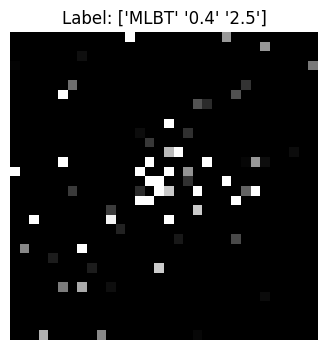

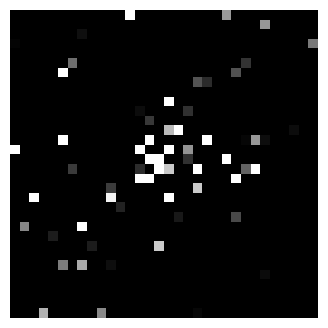

In [10]:
def show_2d_representation(dataset_item,show_labels=False):

  import matplotlib.pyplot as plt
  import numpy as np
  (dataset_x_item,dataset_y_item)=dataset_item
  # Assuming dataset.x contains the images and dataset.y contains the labels
  # Extract the first image and label
  # Plot the first image with a white background
  fig, ax = plt.subplots(figsize=(4, 4))

  ax.imshow(dataset_x_item, cmap='gray', vmin=0, vmax=1)  # Assuming images are normalized between 0 and 1
  if show_labels==True:
    ax.set_title(f'Label: {dataset_y_item}')
  ax.axis('off')
  ax.set_facecolor('white')  # Set white background

  # Save the plot as an image file (e.g., PNG)
  plt.savefig(simulation_directory_path+'first_image_plot_labelless.png')

  # Show the plot
  plt.show()

dataset_item =(dataset_x[0], dataset_y[0])
show_2d_representation(dataset_item,show_labels=True)
show_2d_representation(dataset_item,show_labels=False)

We can use the `trimesh` package to read and visualize the `.off` mesh files.


In [11]:
def get_coordinates(image_array):
  import numpy as np
  # Get the dimensions of the original array
  height, width = image_array.shape
  # Create an array of coordinates (x, y)
  coordinates = np.column_stack((np.repeat(np.arange(height), width),
                                np.tile(np.arange(width), height)))
  return coordinates
def get_point_clouds(image_array,coordinates):
  # Assuming image_array is your 32x32 numpy array
  # image_array = np.random.randint(0, 256, (32, 32), dtype=np.uint8)
  # Create an nx3 array with x, y, and intensity values
  result_array = np.column_stack((coordinates, image_array.flatten()))
  return result_array
image_array = dataset_x[0]
print("Original image shape:", image_array.shape)
coordinates=get_coordinates(image_array)
point_clouds=get_point_clouds(image_array,coordinates)
print("point_clouds.shape:", point_clouds.shape)
print(point_clouds)

Original image shape: (32, 32)
point_clouds.shape: (1024, 3)
[[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  2.  0.]
 ...
 [31. 29.  0.]
 [31. 30.  0.]
 [31. 31.  0.]]


In [12]:
def get_non_zero_point_clouds(data_2d_array):
  # Extract non-zero values and their coordinates
  non_zero_indices = np.transpose(np.nonzero(data))
  non_zero_values_with_coordinates = [(x, y, data[x, y]) for x, y in non_zero_indices]

  # Convert the list of coordinates to a NumPy array
  point_cloud = np.array(non_zero_values_with_coordinates)
  return point_cloud

# Assuming your 32x32 array is named "data"
# Replace this with your actual data
data = dataset_x[0]
non_zero_point_clouds=get_non_zero_point_clouds(data)
print("point_clouds.shape:", non_zero_point_clouds.shape)


point_clouds.shape: (63, 3)


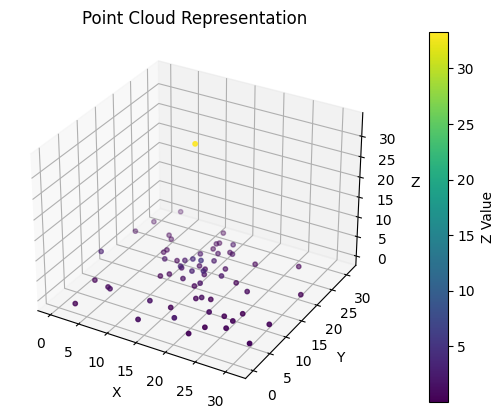

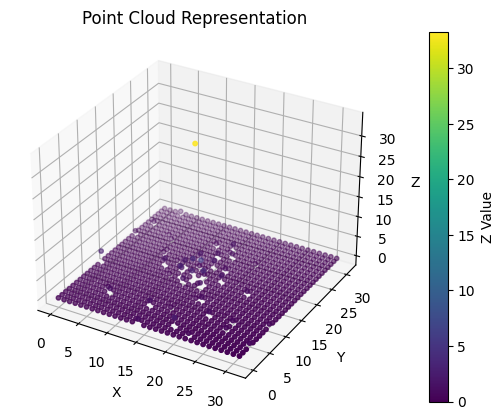

In [13]:
def show_3d_representation(point_clouds):
  import numpy as np
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D

  # Setting point size and color
  point_size = 10
  point_color = [1.0, 0.0, 0.0]  # Red color

  # Assigning colors based on Z values
  colors = point_clouds[:, 2]  # Use Z values for color mapping

  # Plot the point cloud in 3D using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  scatter= ax.scatter(point_clouds[:, 0], point_clouds[:, 1], point_clouds[:, 2], s=point_size, c=colors, cmap='viridis')

  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_title('Point Cloud Representation')

  # Add colorbar to show Z value mapping
  cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
  cbar.set_label('Z Value')

  plt.savefig(simulation_directory_path+'first_image_plot_labelless_3d.png')
  plt.show()

show_3d_representation(non_zero_point_clouds)
show_3d_representation(point_clouds)


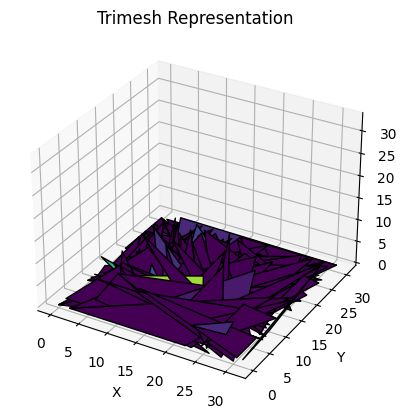

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def show_trimesh_representation(vertices, faces):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plotting the trimesh
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=faces, cmap='viridis', edgecolor='k')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Trimesh Representation')

    plt.show()

# Example usage
# Replace these arrays with your actual trimesh data
# vertices = np.random.rand(100, 3)
vertices = point_clouds
faces = np.random.randint(0, len(point_clouds), (200, 3))

show_trimesh_representation(vertices, faces)


In [15]:
import trimesh
import numpy as np

# def show_trimesh_representation(point_clouds):

# Create a trimesh object with the point cloud
point_cloud_mesh = trimesh.points.PointCloud(point_clouds, colors=[(0,0,255,1) for x in [point_clouds]])

# Visualizing the point cloud with adjusted parameters

scene = point_cloud_mesh.scene()
scene.show()

# show_trimesh_representation(non_zero_point_clouds)
# show_trimesh_representation(point_clouds)


In [17]:
import numpy as np

def get_dataset_non_zero_points(dataset):
    """
    Get 3D points for each entry in the dataset.

    Parameters:
    - dataset: 3D array-like, the dataset containing non-zero values.

    Returns:
    - dataset_points: NumPy array, each entry corresponds to the 3D points of non-zero values for a particular entry in the dataset.
    - min_length: Minimum length of non-zero indices across all entries in the dataset.
    - max_length: Maximum length of non-zero indices across all entries in the dataset.
    """

    dataset_points = []
    min_length = 2000
    max_length = 0

    for data in dataset:
        # Extract non-zero values and their coordinates
        non_zero_indices = np.transpose(np.nonzero(data))
        non_zero_values_with_coordinates = [[x, y, data[x, y]] for x, y in non_zero_indices]

        # Append coordinates to the list
        dataset_points.append(non_zero_values_with_coordinates)

        # Update min and max lengths
        length = len(non_zero_indices)
        min_length = np.minimum(min_length, length)
        max_length = np.maximum(max_length, length)

    # Convert the list of coordinates to a NumPy array
    dataset_points = np.array(dataset_points)

    return dataset_points, min_length, max_length

# Example usage:
dataset_x_points, min_len, max_len = get_dataset_non_zero_points(dataset_x)
print("dataset_x_points shape:", dataset_x_points.shape)
print("Minimum length:", min_len)
print("Maximum length:", max_len)


dataset_x_points shape: (1000,)
Minimum length: 13
Maximum length: 120


<ipython-input-17-fea6b50ffa6d>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset_points = np.array(dataset_points)


In [23]:
import numpy as np

def get_dataset_points(dataset):
    """
    Get 3D points for each entry in the dataset.

    Parameters:
    - dataset: 3D array-like, the dataset containing non-zero values.

    Returns:
    - dataset_points: NumPy array, each entry corresponds to the 3D points of non-zero values for a particular entry in the dataset.

    """
    dataset_points = []
    coordinates=get_coordinates(dataset[0])


    for data in dataset:

        point_clouds=get_point_clouds(data,coordinates)
        # Append coordinates to the list
        dataset_points.append(point_clouds)

    # Convert the list of coordinates to a NumPy array
    dataset_points = np.array(dataset_points)
    return dataset_points

# Example usage:
dataset_x_points = get_dataset_points(dataset_x)
print("dataset_x_points shape:", dataset_x_points.shape)



dataset_x_points shape: (1000, 1024, 3)


In [24]:
print("dataset_x:",type(dataset_x), dataset_x.size, dataset_x.shape)
print("dataset_x_points:",type(dataset_x_points), dataset_x_points.size, dataset_x_points.shape)
print("dataset_y:",type(dataset_y), dataset_y.size,dataset_y.shape)



dataset_x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset_x_points: <class 'numpy.ndarray'> 3072000 (1000, 1024, 3)
dataset_y: <class 'numpy.ndarray'> 3000 (1000, 3)


In [25]:
from sklearn.model_selection import train_test_split

def split_dataset(dataset_x, dataset_x_points, dataset_y, test_size=0.2, random_state=None):
    """
    Split the dataset into training and testing sets.

    Parameters:
    - dataset_x: The input data (3D array).
    - dataset_x_points: The 3D coordinates corresponding to each entry.
    - dataset_y: The target values (2D array).
    - test_size: The proportion of the dataset to include in the test split.
    - random_state: Seed for random number generation.

    Returns:
    - train_data_x, test_data_x: The split input data for training and testing.
    - train_data_x_points, test_data_x_points: The split 3D coordinates for training and testing.
    - train_data_y, test_data_y: The split target values for training and testing.
    """
    # Flatten the input data to 2D
    flattened_dataset_x = dataset_x.reshape(dataset_x.shape[0], -1)

    # Split the dataset
    train_data_x, test_data_x, train_data_x_points, test_data_x_points, train_data_y, test_data_y = \
        train_test_split(flattened_dataset_x, dataset_x_points, dataset_y, test_size=test_size, random_state=random_state)

    # Reshape the input data back to 3D
    train_data_x = train_data_x.reshape(train_data_x.shape[0], dataset_x.shape[1], dataset_x.shape[2])
    test_data_x = test_data_x.reshape(test_data_x.shape[0], dataset_x.shape[1], dataset_x.shape[2])

    return train_data_x, test_data_x, train_data_x_points, test_data_x_points, train_data_y, test_data_y

train_x, test_x, train_points, test_points, train_y, test_y= \
  split_dataset(dataset_x, dataset_x_points, dataset_y, test_size=0.2, random_state=None)
print("train_x:",type(train_x), train_x.size, train_x.shape)
print("train_points:",type(train_points), train_points.size, train_points.shape)
print("train_y:",type(train_y), train_y.size,train_y.shape)

print("test_x:",type(test_x), test_x.size, test_x.shape)
print("test_points:",type(test_points), test_points.size, test_points.shape)
print("test_y:",type(test_y), test_y.size,test_y.shape)


train_x: <class 'numpy.ndarray'> 819200 (800, 32, 32)
train_points: <class 'numpy.ndarray'> 2457600 (800, 1024, 3)
train_y: <class 'numpy.ndarray'> 2400 (800, 3)
test_x: <class 'numpy.ndarray'> 204800 (200, 32, 32)
test_points: <class 'numpy.ndarray'> 614400 (200, 1024, 3)
test_y: <class 'numpy.ndarray'> 600 (200, 3)


In [ ]:
# mesh = trimesh.load(os.path.join(DATA_DIR, "chair/train/chair_0001.off"))
# mesh.show()


To convert a mesh file to a point cloud we first need to sample points on the mesh
surface. `.sample()` performs a unifrom random sampling. Here we sample at 2048 locations
and visualize in `matplotlib`.


In [ ]:
# points = mesh.sample(2048)

# fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(points[:, 0], points[:, 1], points[:, 2])
# ax.set_axis_off()
# plt.show()


To generate a `tf.data.Dataset()` we need to first parse through the ModelNet data
folders. Each mesh is loaded and sampled into a point cloud before being added to a
standard python list and converted to a `numpy` array. We also store the current
enumerate index value as the object label and use a dictionary to recall this later.


In [ ]:

# def parse_dataset(num_points=2048):

#     train_points = []
#     train_labels = []
#     test_points = []
#     test_labels = []
#     class_map = {}
#     folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))

#     for i, folder in enumerate(folders):
#         print("processing class: {}".format(os.path.basename(folder)))
#         # store folder name with ID so we can retrieve later
#         class_map[i] = folder.split("/")[-1]
#         # gather all files
#         train_files = glob.glob(os.path.join(folder, "train/*"))
#         test_files = glob.glob(os.path.join(folder, "test/*"))

#         for f in train_files:
#             train_points.append(trimesh.load(f).sample(num_points))
#             train_labels.append(i)

#         for f in test_files:
#             test_points.append(trimesh.load(f).sample(num_points))
#             test_labels.append(i)

#     return (
#         np.array(train_points),
#         np.array(test_points),
#         np.array(train_labels),
#         np.array(test_labels),
#         class_map,
#     )



In [29]:

def parse_dataset():

    # train_points = []
    train_labels = []
    # test_points = []
    test_labels = []

    # folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))

    i=0
    for f in train_x:

        train_labels.append(i)
        i=i+1

    for f in test_x:

        test_labels.append(i)
        i=i+1

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),

    )



Set the number of points to sample and batch size and parse the dataset. This can take
~5minutes to complete.


In [30]:
# NUM_POINTS = 2048
NUM_POINTS = 1024
# NUM_CLASSES = 10
NUM_CLASSES = 2
BATCH_SIZE = 32

train_points, test_points, train_labels, test_labels = parse_dataset()
print(train_labels.size,test_labels.size)

800 200


Our data can now be read into a `tf.data.Dataset()` object. We set the shuffle buffer
size to the entire size of the dataset as prior to this the data is ordered by class.
Data augmentation is important when working with point cloud data. We create a
augmentation function to jitter and shuffle the train dataset.


In [31]:

def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_points, test_labels))

train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)



### Build a model

Each convolution and fully-connected layer (with exception for end layers) consits of
Convolution / Dense -> Batch Normalization -> ReLU Activation.


In [32]:

def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)



PointNet consists of two core components. The primary MLP network, and the transformer
net (T-net). The T-net aims to learn an affine transformation matrix by its own mini
network. The T-net is used twice. The first time to transform the input features (n, 3)
into a canonical representation. The second is an affine transformation for alignment in
feature space (n, 3). As per the original paper we constrain the transformation to be
close to an orthogonal matrix (i.e. ||X*X^T - I|| = 0).


In [83]:

class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

    def get_config(self):
        return {'num_features': self.num_features, 'l2reg': self.l2reg}


 We can then define a general function to build T-net layers.


In [84]:

def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])



The main network can be then implemented in the same manner where the t-net mini models
can be dropped in a layers in the graph. Here we replicate the network architecture
published in the original paper but with half the number of weights at each layer as we
are using the smaller 10 class ModelNet dataset.


In [85]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

# outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)
outputs = layers.Dense(NUM_CLASSES, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()


Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 1024, 3)]            0         []                            
                                                                                                  
 conv1d_33 (Conv1D)          (None, 1024, 32)             128       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_51 (Ba  (None, 1024, 32)             128       ['conv1d_33[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_51 (Activation)  (None, 1024, 32)             0         ['batch_normalization_5

### Train model

Once the model is defined it can be trained like any other standard classification model
using `.compile()` and `.fit()`.


In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Preprocess y_train and y_test
# One-hot encode the categorical variable
y_train_categorical = np.array(train_y[:, 0]).reshape(-1, 1)
y_test_categorical = np.array(test_y[:, 0]).reshape(-1, 1)

encoder = OneHotEncoder(sparse=False)
y_train_categorical_encoded = encoder.fit_transform(y_train_categorical)
y_test_categorical_encoded = encoder.transform(y_test_categorical)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
print(y_test_categorical[:10])

[['MMAT']
 ['MMAT']
 ['MLBT']
 ['MMAT']
 ['MMAT']
 ['MMAT']
 ['MLBT']
 ['MLBT']
 ['MLBT']
 ['MLBT']]


In [38]:
print(y_test_categorical_encoded[:10])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [86]:
best_model_file_path = simulation_directory_path+f'jetml_pointnet_classification_eloss_{class_labels_str}_size_{1000}_best_model.keras'
# if not path.exists(save_dir):
#     makedirs(save_dir)
print('File Path to Save Best Model : {}'.format(best_model_file_path))

File Path to Save Best Model : /content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.data/simulation_results/jetml_pointnet_classification_eloss_MMAT_MLBT_size_1000_best_model.keras


In [48]:
pip install --upgrade keras tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [87]:
from time import time
from tensorflow.keras.callbacks import ModelCheckpoint, History
import json

learning_rate=0.001
monitor='val_loss' #'val_accuracy' or 'val_loss'
n_epochs=20

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# Use ModelCheckpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    best_model_file_path,
    monitor=monitor,
    save_best_only=True,
    model='min',
    # mode="max" if monitor == "val_accuracy" else "min",
    verbose=1
)

# Use History callback to retrieve the training history
history_callback = History()

model.compile(
    # loss="sparse_categorical_crossentropy",
    loss="binary_crossentropy",
    optimizer=optimizer,
    # metrics=["sparse_categorical_accuracy"],
    metrics=["accuracy"],
)
model.summary()

# Include both ModelCheckpoint and History callbacks in the callbacks list
# callbacks=[checkpoint_callback]
start = time()
history=model.fit(train_points,
          y_train_categorical_encoded,
          epochs=n_epochs,
          validation_data=(test_points,y_test_categorical_encoded),
          callbacks=[checkpoint_callback]
          )
train_time = (time()-start)/60.0



Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 1024, 3)]            0         []                            
                                                                                                  
 conv1d_33 (Conv1D)          (None, 1024, 32)             128       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_51 (Ba  (None, 1024, 32)             128       ['conv1d_33[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_51 (Activation)  (None, 1024, 32)             0         ['batch_normalization_5

In [70]:
import pandas as pd

# Save the training history to a file (e.g., JSON format)
current_simulation_name=f'jetml_pointnet_classification_eloss_{class_labels_str}_size_{1000}'
current_simulation_path=simulation_directory_path+current_simulation_name
training_history_file_path =current_simulation_name+'_training_history'

training_history_file_path_json=training_history_file_path+'.json'
with open(training_history_file_path_json, 'w') as f:
    json.dump(history.history, f)
print(training_history_file_path_json)

training_history_file_path_csv=training_history_file_path+'.csv'
pd.DataFrame.from_dict(history.history).to_csv(training_history_file_path_csv,index=False)
print(training_history_file_path_csv)

training_history_file_path_npy=training_history_file_path+'.npy'
np.save(training_history_file_path_npy,history.history)
print(training_history_file_path_npy)

jetml_pointnet_classification_eloss_MMAT_MLBT_size_1000_training_history.json
jetml_pointnet_classification_eloss_MMAT_MLBT_size_1000_training_history.csv
jetml_pointnet_classification_eloss_MMAT_MLBT_size_1000_training_history.npy


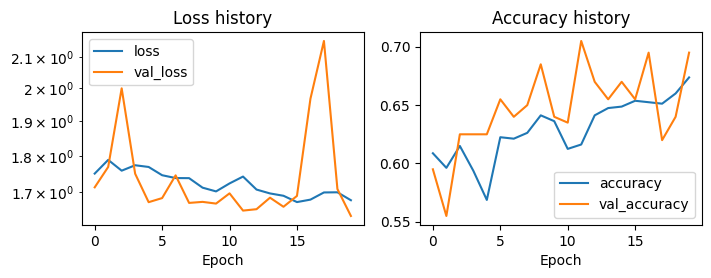

In [71]:
from matplotlib import pyplot as plt
def plot_train_history(history):

    color_list = ['red','blue','black','green']

    plt.figure(figsize=(8, 2.5), dpi=100)

    plt.subplot(121)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.yscale('log')
    plt.xlabel('Epoch')
    plt.title('Loss history')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.title('Accuracy history')
    plt.legend()
    file_name='_accuracy_loss.png'
    file_path=current_simulation_path+file_name
    plt.savefig(file_path)
    plt.show()
    plt.close()
# plot the training history for each fold
plot_train_history(history)

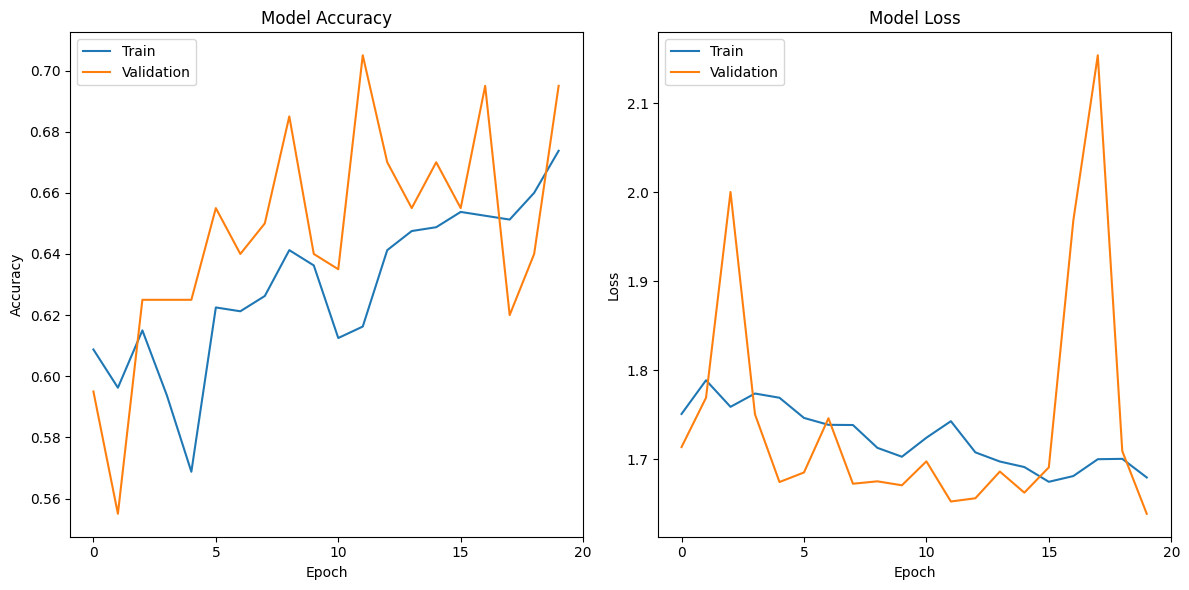

In [82]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    # Set ticks on the epoch axis to display only integer values
    plt.xticks(range(0, len(history.history['accuracy'])+1,5))

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Set ticks on the epoch axis to display only integer values
    plt.xticks(range(0, len(history.history['accuracy'])+1,5))

    # Adjust layout and show the plot
    plt.tight_layout()

    # Save the plot with high resolution (300 dpi)
    file_name='_accuracy_loss.png'
    file_path=current_simulation_path+file_name
    plt.savefig(file_path, dpi=300)
    plt.show()
    plt.close()

# # Assuming you have already trained the model and obtained the history object
# history = model.fit(train_points, y_train_categorical_encoded, epochs=20, validation_data=(test_points, y_test_categorical_encoded))

# Plot the training history
plot_training_history(history)


## Visualize predictions

We can use matplotlib to visualize our trained model performance.


In [41]:
# Assuming your original labels are ['MMAT', 'MLBT']
original_labels = ['MMAT', 'MLBT']

# Create a mapping from numerical labels to categorical labels
label_mapping = {i: label for i, label in enumerate(original_labels)}

# Example encoded labels
encoded_labels = [0, 1]

# Decode the encoded labels using the mapping
decoded_labels = [label_mapping[label] for label in encoded_labels]

print(decoded_labels)


['MMAT', 'MLBT']


1/1 [==============================] - 1s 634ms/step


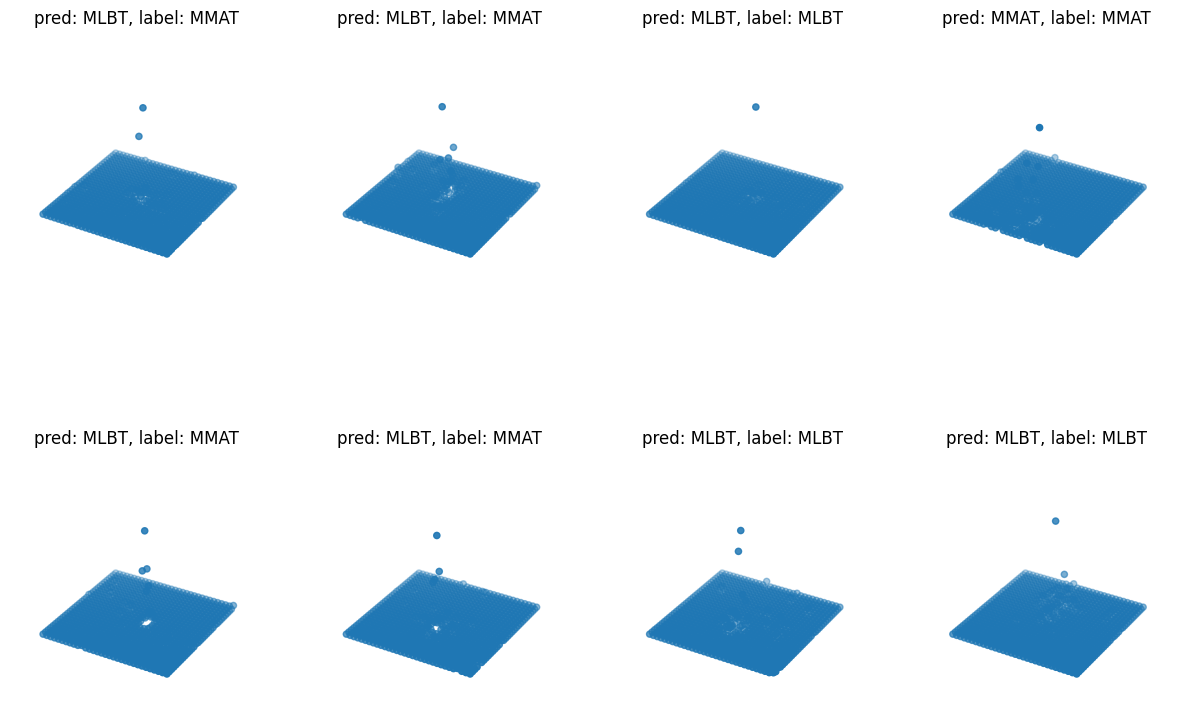

In [77]:

data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            # CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
            label_mapping[preds[i].numpy()], test_y[i, 0]
        )
    )
    ax.set_axis_off()
# Save the plot with high resolution (300 dpi)
file_name='_test_dataset_prediction_visualization.png'
file_path=current_simulation_path+file_name
plt.savefig(file_path, dpi=300)
plt.show()
plt.close()
